In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve,auc,classification_report,confusion_matrix
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
#import dataset and declare dependent and independent variables
df=pd.read_csv("mortgage_final_data.csv")
df.drop("id",axis=1,inplace=True)
y=df["status_time"].values
x=df.drop("status_time", axis=1).values

In [3]:
df

,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,...,gdp_dif,gdp_inc,uer_orig,uer_avg,uer_dif,uer_inc,hpi_avg,hpi_dif,hpi_inc,status_time
0,48,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,8.3,...,-0.183234,-0.063203,4.7,7.241667,3.6,0.765957,176.657917,59.42,0.682753,1
1,26,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,4.7,...,-0.747772,-0.257929,4.7,4.700000,0.0,0.000000,225.695000,38.19,0.204323,2
2,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,4.5,...,-1.206168,-0.416044,4.7,4.580000,-0.2,-0.042553,222.164000,127.79,1.426546,2
3,27,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,4.4,...,-0.537415,-0.185371,4.7,4.600000,-0.3,-0.063830,224.593333,35.48,0.189824,2
4,56,19,25,139,190474.11,75.834755,6.580,181.43,1.717053,6.6,...,-1.182084,-0.407736,4.7,7.319355,1.9,0.404255,175.143226,-9.99,-0.052189,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41724,52,25,52,146,608968.18,110.352418,7.850,161.13,1.081049,8.0,...,0.000000,0.000000,8.0,8.000000,0.0,0.000000,161.130000,-65.16,-0.287949,1
41725,53,26,52,200,146737.39,114.559046,2.000,173.17,0.892996,7.6,...,-0.188053,-0.173954,8.0,7.800000,-0.4,-0.050000,167.150000,-51.93,-0.230697,1
41726,52,26,52,146,78277.84,81.559381,7.720,161.13,1.081049,8.0,...,0.000000,0.000000,8.0,8.000000,0.0,0.000000,161.130000,-63.97,-0.284185,1
41727,53,26,52,146,234815.68,103.820377,2.000,173.17,0.892996,7.6,...,-0.188053,-0.173954,8.0,7.800000,-0.4,-0.050000,167.150000,-51.93,-0.230697,1


In [4]:
#Set possible K values for KNN
knn_n=[1,3,5,7,9,11,13,15]

In [8]:
newdf = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
newdf=newdf.round(3)

In [9]:
newdf


,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,...,gdp_dif,gdp_inc,uer_orig,uer_avg,uer_dif,uer_inc,hpi_avg,hpi_dif,hpi_inc,status_time
0,1.591,-3.674,0.225,-1.473,-1.058,-2.170,0.937,-1.534,0.614,1.234,...,0.528,0.381,-0.477,1.754,1.300,1.307,-0.938,1.395,2.274,-1.324
1,-0.550,-0.274,0.225,0.019,-0.683,-0.619,0.164,1.211,0.335,-0.745,...,0.240,0.194,-0.477,-0.760,-0.559,-0.576,1.206,0.936,0.640,0.755
2,-0.258,-3.538,0.225,-1.414,-0.983,-1.978,2.043,0.941,0.108,-0.855,...,0.006,0.043,-0.477,-0.879,-0.662,-0.681,1.052,2.876,4.815,0.755
3,-0.453,-0.274,0.225,0.019,-0.945,-0.584,0.914,1.117,0.439,-0.910,...,0.347,0.264,-0.477,-0.859,-0.714,-0.733,1.158,0.877,0.590,0.755
4,2.370,-0.139,0.225,0.078,-0.267,-0.205,-0.396,-0.313,0.120,0.300,...,0.018,0.051,-0.477,1.831,0.422,0.418,-1.004,-0.107,-0.237,-1.324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41724,1.981,0.677,4.399,0.496,1.784,1.174,0.250,-1.021,-0.195,1.069,...,0.621,0.441,5.307,2.504,-0.559,-0.576,-1.616,-1.302,-1.042,-1.324
41725,2.078,0.813,4.399,3.719,-0.482,1.342,-2.726,-0.601,-0.288,0.849,...,0.525,0.275,5.307,2.306,-0.766,-0.699,-1.353,-1.015,-0.846,-1.324
41726,1.981,0.813,4.399,0.496,-0.817,0.024,0.184,-1.021,-0.195,1.069,...,0.621,0.441,5.307,2.504,-0.559,-0.576,-1.616,-1.276,-1.029,-1.324
41727,2.078,0.813,4.399,0.496,-0.050,0.913,-2.726,-0.601,-0.288,0.849,...,0.525,0.275,5.307,2.306,-0.766,-0.699,-1.353,-1.015,-0.846,-1.324


In [10]:
x=newdf.drop("status_time", axis=1).values

In [11]:
#Set K-Fold cross-validation (K=5)
kf=KFold(n_splits=5,random_state=2,shuffle=True)

In [12]:
#Using iteration to find the best F-Score with the best K in KNN
best_k=knn_n[0]
best_score=0
for k in knn_n:
    score=0
    for train_index,test_index in kf.split(x):
        clf=KNeighborsClassifier(n_neighbors=k)
        clf.fit(x[train_index],y[train_index])
        a=clf.score(x[test_index],y[test_index])
        score+=a        
    avg_score=score/5
    if avg_score>best_score:
        best_score=avg_score
        best_k=k
print("The best F-Score : %.3f"%best_score)
print("The K of KNN linked to the best score is: ",best_k)

The best F-Score : 0.787
The K of KNN linked to the best score is:  15


[[2055 1041]
 [ 773 4477]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      3096
           1       0.81      0.85      0.83      5250

    accuracy                           0.78      8346
   macro avg       0.77      0.76      0.76      8346
weighted avg       0.78      0.78      0.78      8346



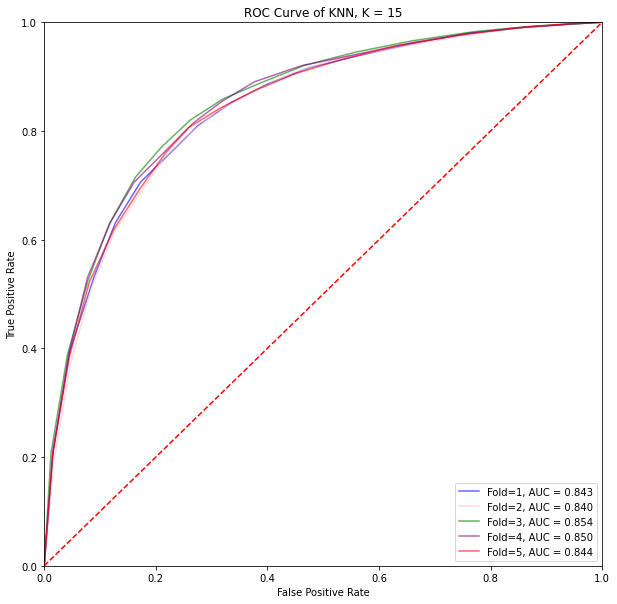

Average_AUC = 0.846


In [13]:
#Redo the continuous prediction with best K value and draw the roc-curve.
fold=0
sum_auc=0
colors=["blue","pink","green","purple","red"]
plt.figure(figsize=(10,10))
for train_index,test_index in kf.split(x):
        clf=KNeighborsClassifier(n_neighbors=best_k)
        clf.fit(x[train_index],y[train_index])
        if fold==0:
            #Show the first confusion matrix(classification)
            y_pred = clf.predict(x[test_index])
            print(confusion_matrix(y[test_index]-1, y_pred-1))
            print(classification_report(y[test_index]-1, y_pred-1))
        y_pred = clf.predict_proba(x[test_index])
        fpr, tpr, threshold = roc_curve(y[test_index]-1, y_pred[:,-1]-1)
        roc_auc = auc(fpr, tpr)
        sum_auc+=roc_auc
        plt.plot(fpr, tpr, color=colors[fold], label = 'Fold='+str(fold+1)+', AUC = %0.3f' % roc_auc,alpha=0.6)
        fold+=1
plt.legend(loc = 'lower right')
#Add the diagonal
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
title='ROC Curve of KNN, K = '+str(best_k)
plt.title(title)
plt.show()
#Show the average AUC
print("Average_AUC = %0.3f"%(sum_auc/5))